# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayacucho
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | muli
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | mitu
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | belyy yar
Processing Record 10 of Set 1 | altay
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | dazuocun
Processing Record 14 of Set 1 | umba
Processing Record 15 of Set 1 | anshun
Processing Record 16 of Set 1 | mikun'
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of 

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayacucho,5.6639,-67.6236,30.28,67,38,1.32,VE,1724947387
1,alofi,-19.0595,-169.9187,18.94,94,20,2.57,NU,1724947388
2,adamstown,-25.0660,-130.1015,18.94,71,8,4.54,PN,1724947390
3,muli,2.9167,73.5667,28.40,75,16,4.08,MV,1724947391
4,lazaro cardenas,17.9583,-102.2000,29.31,70,70,0.75,MX,1724947287


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayacucho,5.6639,-67.6236,30.28,67,38,1.32,VE,1724947387
1,alofi,-19.0595,-169.9187,18.94,94,20,2.57,NU,1724947388
2,adamstown,-25.0660,-130.1015,18.94,71,8,4.54,PN,1724947390
3,muli,2.9167,73.5667,28.40,75,16,4.08,MV,1724947391
4,lazaro cardenas,17.9583,-102.2000,29.31,70,70,0.75,MX,1724947287


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

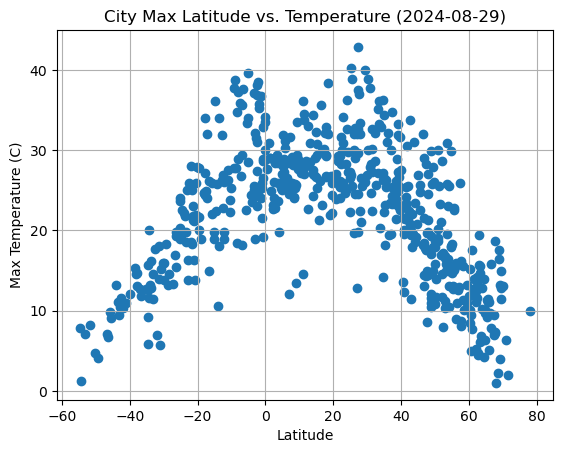

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

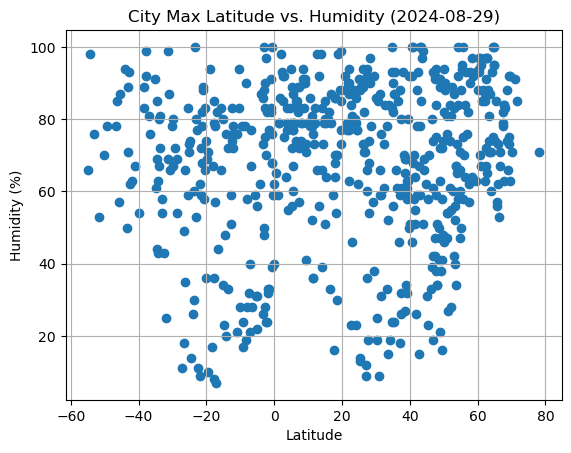

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

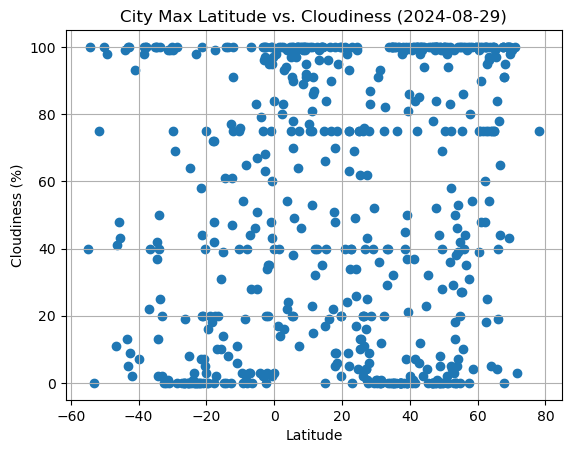

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

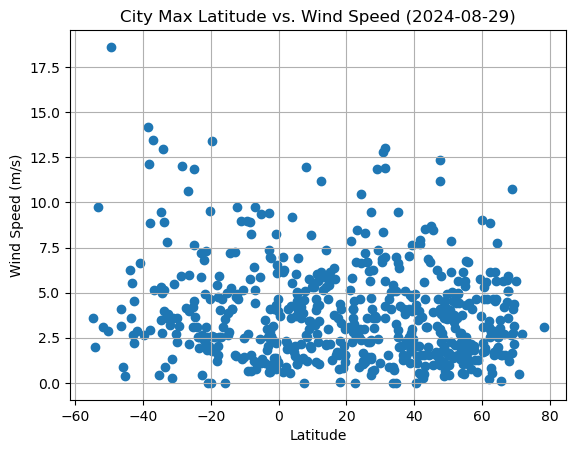

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def weather_regression(x, y, title, text_coordinates):
    #calculate liner regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)

    regression_value = x*slope+intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plt it with plt.scatter
    plt.scatter(x, y)
    
    # Create regression line
    plt.plot(x, regression_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(equation, text_coordinates, color='red', fontsize=15)
    plt.title(f'Latitude vs. {title}')
    print(f'r^2-value:{r_value**2}')
    plt.show()
    

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayacucho,5.6639,-67.6236,30.28,67,38,1.32,VE,1724947387
3,muli,2.9167,73.5667,28.40,75,16,4.08,MV,1724947391
4,lazaro cardenas,17.9583,-102.2000,29.31,70,70,0.75,MX,1724947287
6,mitu,1.1983,-70.1733,30.85,59,17,0.61,CO,1724947394
8,belyy yar,53.6039,91.3903,15.94,67,0,2.00,RU,1724947396


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,alofi,-19.0595,-169.9187,18.94,94,20,2.57,NU,1724947388
2,adamstown,-25.0660,-130.1015,18.94,71,8,4.54,PN,1724947390
5,bredasdorp,-34.5322,20.0403,9.25,69,42,2.78,ZA,1724947393
7,west island,-12.1568,96.8225,25.99,78,100,9.77,CC,1724947395
11,waitangi,-43.9535,-176.5597,13.23,94,99,6.26,NZ,1724947399


###  Temperature vs. Latitude Linear Regression Plot

r^2-value:0.49627852437145875


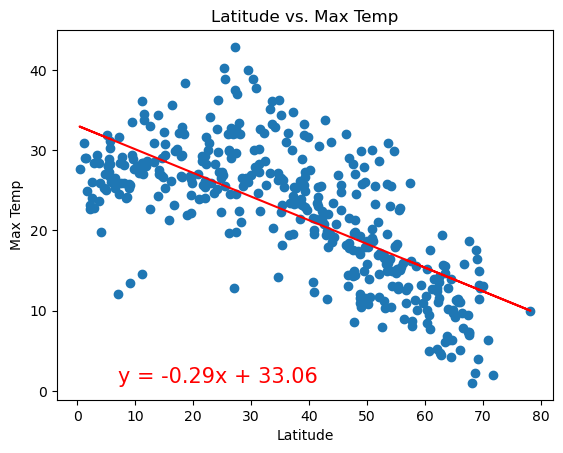

In [38]:
# Linear regression on Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp",(7,1))

r^2-value:0.678229311260961


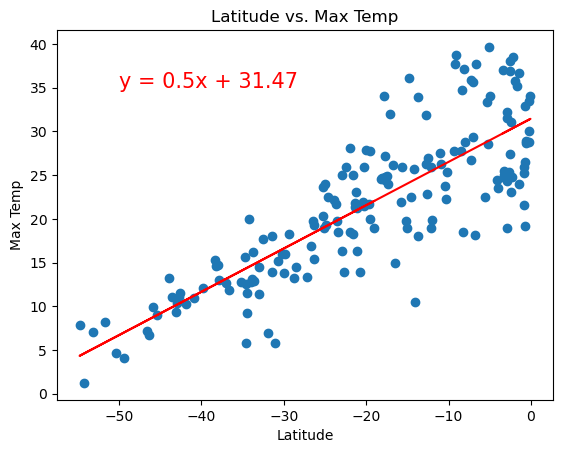

In [40]:
# Linear regression on Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp",(-50,35))

**Discussion about the linear relationship:** 
The linear relationship of Latitude vs Max Temp in the northern hemisphere is negative, but positive in the southern hemisphere. The charts show that as the Latitude increases in the northern hemisphere, the Max Temp decreases producing an R^2 value of 0.49627. Alternatively, as the Latitude decreases in the southern hemisphere, the Max Temp increases producing an R^2 value of 0.67822. This makes sense as temperatures decrease closer to the northern and southern poles and increase closer to the equator or as the Latitude approaches zero.

### Humidity vs. Latitude Linear Regression Plot

r^2-value:0.0004077347737158077


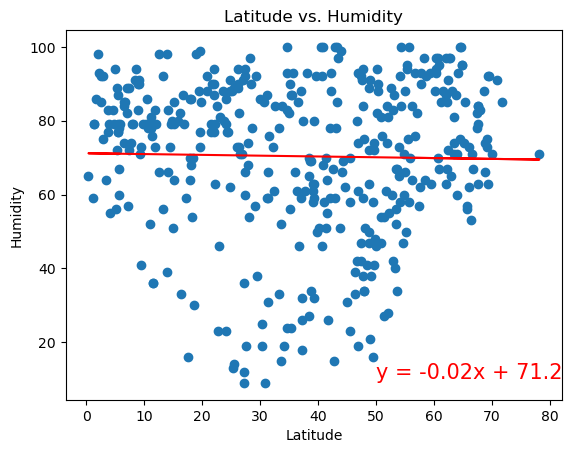

In [41]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity",(50,10))

r^2-value:0.04029090876466961


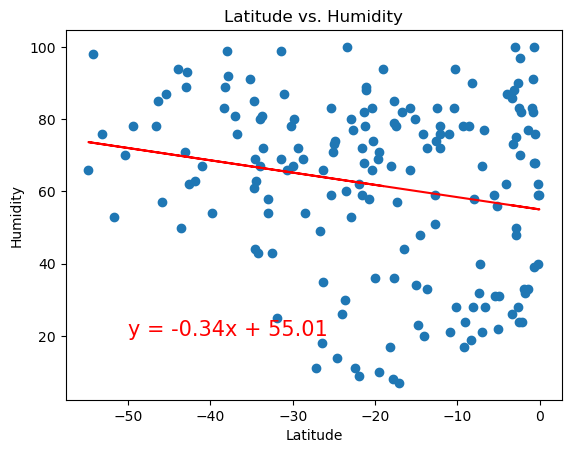

In [43]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity",(-50,20))

**Discussion about the linear relationship:** 
The linear relationship of Latitude vs Humidity in the northern hemisphere is almost zero showing that Humidity does not change as Latitude changes, producing a R^2 value of 0.00040773. Alternatively, in the southern hemisphere, the relationship is higher than in the northern hemisphere, but still low at 0.0402909. These results suggest that there is a weak relationship between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r^2-value:3.5158077695869396e-05


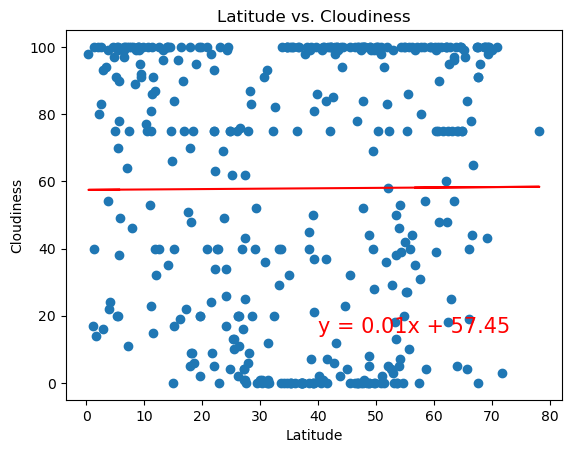

In [50]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness",(40,15))

r^2-value:0.0002152181857312221


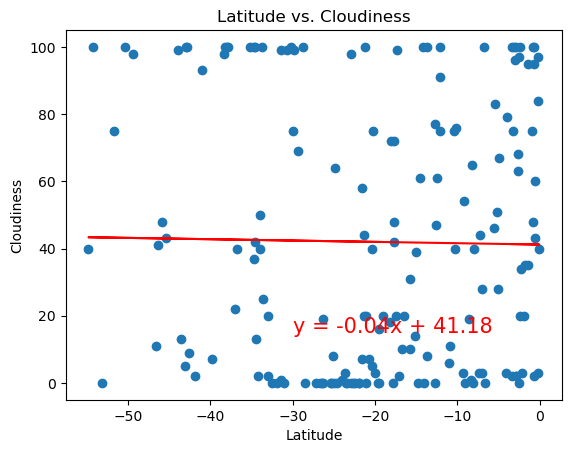

In [45]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness",(-30,15))

**Discussion about the linear relationship:** 
Just like the linear relationship of Latitude vs Humidity, the linear relationship between Latitude vs Cloudiness in the northern hemisphere produces an almost horizontal line, showing that Cloudiness does not change as Latitude changes. Similarily in the southern hemisphere, the relationship is higher than in the northern hemisphere, but still low at 0.000215. These results suggest that there is a weak relationship between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

r^2-value:0.006299443446214819


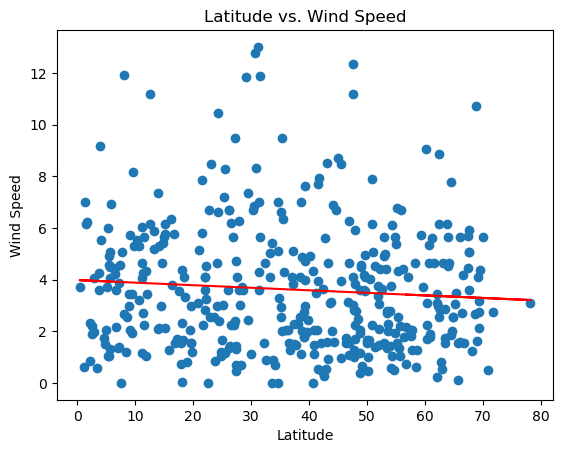

In [48]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed",(40,15))

r^2-value:0.033478526435158674


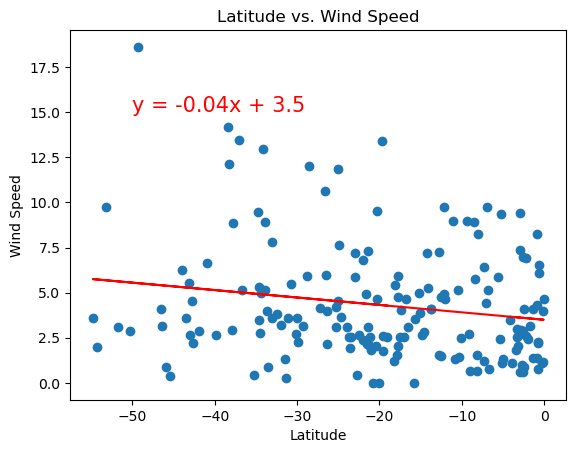

In [49]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(-50,15))

**Discussion about the linear relationship:**
The linear relationship between Latitude vs. Wind Speed in the northern hemisphere produces an almost horizontal line, showing that Wind Speed does not drastically change as Latitude changes producing a R^2 value of 0.0062994. The linear relationship in the southern hemisphere is higher than in the northern hemisphere but still low at 0.03347. These results suggest that there is a weak relationship between Latitude and Wind Speed in both hemispheres, but it is strongest in the southern hemisphere.